In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)

In [2]:
data = pd.read_csv('clean_car_data.csv')

In [3]:
data.head()



,Unnamed: 0,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,2,Chennai,2011,46000,Petrol,Manual,First,18.0,1199,88.70,5.0,4.50
1,7,Mumbai,2016,36000,Diesel,Automatic,First,11.3,2755,171.50,8.0,17.50
2,10,Kochi,2018,25692,Petrol,Manual,First,21.5,1462,103.25,5.0,9.95
3,15,Delhi,2014,110000,Diesel,Manual,First,13.0,2477,175.56,7.0,15.00
4,20,Kochi,2014,32982,Diesel,Automatic,First,22.6,1995,190.00,5.0,18.55


In [4]:
data["me_ratio"] = data.Mileage / data.Engine

In [5]:
data[["Kilometers_Driven", "Power", "me_ratio"]].head()

,Kilometers_Driven,Power,me_ratio
0,46000,88.70,0.015013
1,36000,171.50,0.004102
2,25692,103.25,0.014706
3,110000,175.56,0.005248
4,32982,190.00,0.011328


In [6]:
data

,Unnamed: 0,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,me_ratio
0,2,Chennai,2011,46000,Petrol,Manual,First,18.0,1199,88.70,5.0,4.50,0.015013
1,7,Mumbai,2016,36000,Diesel,Automatic,First,11.3,2755,171.50,8.0,17.50,0.004102
2,10,Kochi,2018,25692,Petrol,Manual,First,21.5,1462,103.25,5.0,9.95,0.014706
3,15,Delhi,2014,110000,Diesel,Manual,First,13.0,2477,175.56,7.0,15.00,0.005248
4,20,Kochi,2014,32982,Diesel,Automatic,First,22.6,1995,190.00,5.0,18.55,0.011328
...,...,...,...,...,...,...,...,...,...,...,...,...,...
818,5999,Chennai,2016,10000,Petrol,Manual,First,17.5,1193,88.70,5.0,4.00,0.014669
819,6002,Mumbai,2011,38000,Petrol,Manual,First,16.0,1598,103.50,5.0,3.25,0.010013
820,6005,Pune,2016,37208,Diesel,Manual,First,24.0,1248,88.50,5.0,7.43,0.019231
821,6010,Delhi,2013,33746,Petrol,Manual,First,18.0,1198,86.80,5.0,3.20,0.015025


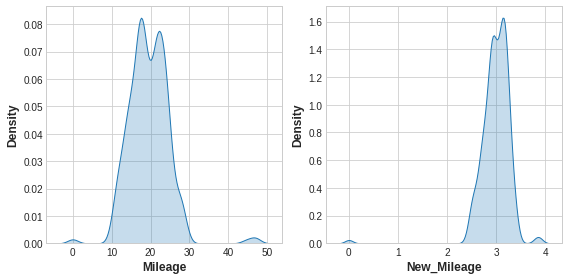

In [7]:
# If the feature has 0.0 values, use np.log1p (log(1+x)) instead of np.log
data["New_Mileage"] = data.Mileage.apply(np.log1p)

# Plot a comparison
fig, axs = plt.subplots(1, 2, figsize=(8, 4))
sns.kdeplot(data.Mileage, shade=True, ax=axs[0])
sns.kdeplot(data.New_Mileage, shade=True, ax=axs[1]);

In [8]:
car_features = ["Owner_Type", "Mileage", "Engine", "Power",
    "Fuel_Type", "Kilometers_Driven"]
data["CarFeatures"] = data[car_features].sum(axis=1)

data[car_features + ["CarFeatures"]].head(10)

,Owner_Type,Mileage,Engine,Power,Fuel_Type,Kilometers_Driven,CarFeatures
0,First,18.0,1199,88.70,Petrol,46000,47305.70
1,First,11.3,2755,171.50,Diesel,36000,38937.80
2,First,21.5,1462,103.25,Petrol,25692,27278.75
3,First,13.0,2477,175.56,Diesel,110000,112665.56
4,First,22.6,1995,190.00,Diesel,32982,35189.60
5,First,17.0,1199,88.70,Petrol,37430,38734.70
6,Second,16.0,1598,103.50,Petrol,55431,57148.50
7,First,24.0,1248,88.50,Diesel,50075,51435.50
8,First,14.6,1999,149.92,Petrol,46374,48537.52
9,First,11.2,2694,163.70,Petrol,70704,73572.90


In [9]:
# gt : greater-than

car_features = ["Mileage", "Engine", "Power"]
data["CarFeatures"] = data[car_features].gt(0).sum(axis=1)

data[car_features + ["CarFeatures"]].head(10)

,Mileage,Engine,Power,CarFeatures
0,18.0,1199,88.70,3
1,11.3,2755,171.50,3
2,21.5,1462,103.25,3
3,13.0,2477,175.56,3
4,22.6,1995,190.00,3
5,17.0,1199,88.70,3
6,16.0,1598,103.50,3
7,24.0,1248,88.50,3
8,14.6,1999,149.92,3
9,11.2,2694,163.70,3


In [10]:
df = pd.read_csv('car-data.csv')

In [11]:
df

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,7.88 Lakh,4.75
6015,6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,NaN,4.00
6016,6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,NaN,2.90
6017,6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,NaN,2.65


In [12]:
df[["Value", "Level"]] = (  # Create two new features
    df["Power"]           # from the Power feature
    .str                         # through the string accessor
    .split(" ", expand=True)     # by splitting on " "
                                 # and expanding the result into separate columns
)

df[["Power", "Value", "Level"]].head(10)

,Power,Value,Level
0,58.16 bhp,58.16,bhp
1,126.2 bhp,126.2,bhp
2,88.7 bhp,88.7,bhp
3,88.76 bhp,88.76,bhp
4,140.8 bhp,140.8,bhp
5,55.2 bhp,55.2,bhp
6,63.1 bhp,63.1,bhp
7,171.5 bhp,171.5,bhp
8,103.6 bhp,103.6,bhp
9,74 bhp,74,bhp


In [13]:
df["Engine_and_Fuel_Type"] = df["Engine"] + "_" + df["Fuel_Type"]
df[["Engine", "Fuel_Type", "Engine_and_Fuel_Type"]].head()

,Engine,Fuel_Type,Engine_and_Fuel_Type
0,998 CC,CNG,998 CC_CNG
1,1582 CC,Diesel,1582 CC_Diesel
2,1199 CC,Petrol,1199 CC_Petrol
3,1248 CC,Diesel,1248 CC_Diesel
4,1968 CC,Diesel,1968 CC_Diesel


In [14]:
data

,Unnamed: 0,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,me_ratio,New_Mileage,CarFeatures
0,2,Chennai,2011,46000,Petrol,Manual,First,18.0,1199,88.70,5.0,4.50,0.015013,2.944439,3
1,7,Mumbai,2016,36000,Diesel,Automatic,First,11.3,2755,171.50,8.0,17.50,0.004102,2.509599,3
2,10,Kochi,2018,25692,Petrol,Manual,First,21.5,1462,103.25,5.0,9.95,0.014706,3.113515,3
3,15,Delhi,2014,110000,Diesel,Manual,First,13.0,2477,175.56,7.0,15.00,0.005248,2.639057,3
4,20,Kochi,2014,32982,Diesel,Automatic,First,22.6,1995,190.00,5.0,18.55,0.011328,3.161247,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
818,5999,Chennai,2016,10000,Petrol,Manual,First,17.5,1193,88.70,5.0,4.00,0.014669,2.917771,3
819,6002,Mumbai,2011,38000,Petrol,Manual,First,16.0,1598,103.50,5.0,3.25,0.010013,2.833213,3
820,6005,Pune,2016,37208,Diesel,Manual,First,24.0,1248,88.50,5.0,7.43,0.019231,3.218876,3
821,6010,Delhi,2013,33746,Petrol,Manual,First,18.0,1198,86.80,5.0,3.20,0.015025,2.944439,3


In [15]:
data["AveragePower"] = (
    data.groupby("Fuel_Type")  # for each state
    ["Power"]                 # select the income
    .transform("mean")         # and compute its mean
)

data[["Fuel_Type", "Power", "AveragePower"]].head(10)

,Fuel_Type,Power,AveragePower
0,Petrol,88.70,102.385337
1,Diesel,171.50,136.319684
2,Petrol,103.25,102.385337
3,Diesel,175.56,136.319684
4,Diesel,190.00,136.319684
5,Petrol,88.70,102.385337
6,Petrol,103.50,102.385337
7,Diesel,88.50,136.319684
8,Petrol,149.92,102.385337
9,Petrol,163.70,102.385337


In [16]:
data["LocationFreq"] = (
    data.groupby("Location")
    ["Location"]
    .transform("count")
    / data.Location.count()
)

data[["Location", "LocationFreq"]].head(10)

,Location,LocationFreq
0,Chennai,0.058323
1,Mumbai,0.167679
2,Kochi,0.172539
3,Delhi,0.065614
4,Kochi,0.172539
5,Kochi,0.172539
6,Coimbatore,0.164034
7,Kochi,0.172539
8,Bangalore,0.038882
9,Bangalore,0.038882


In [17]:
# Create splits
df_train = data.sample(frac=0.5)
df_valid = data.drop(df_train.index)

# Create the average claim amount by coverage type, on the training set
df_train["AveragePrice"] = df_train.groupby("Fuel_Type")["Price"].transform("mean")

# Merge the values into the validation set
df_valid = df_valid.merge(
    df_train[["Fuel_Type", "AveragePrice"]].drop_duplicates(),
    on="Fuel_Type",
    how="left",
)

df_valid[["Fuel_Type", "AveragePrice"]].head(10)

,Fuel_Type,AveragePrice
0,Petrol,9.106379
1,Diesel,19.223889
2,Diesel,19.223889
3,Petrol,9.106379
4,Petrol,9.106379
5,Petrol,9.106379
6,Petrol,9.106379
7,Petrol,9.106379
8,Diesel,19.223889
9,Petrol,9.106379


In [18]:
# One-hot encode Categorical feature, adding a column prefix "Cat"
df_new = pd.get_dummies(df.Fuel_Type, prefix="Fuel")

# Multiply row-by-row
df_new = df_new.mul(df.Seats, axis=0)

# Join the new features to the feature set
df = df.join(df_new)

In [19]:
df

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Value,Level,Engine_and_Fuel_Type,Fuel_CNG,Fuel_Diesel,Fuel_Electric,Fuel_LPG,Fuel_Petrol
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75,58.16,bhp,998 CC_CNG,5.0,0.0,0.0,0.0,0.0
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50,126.2,bhp,1582 CC_Diesel,0.0,5.0,0.0,0.0,0.0
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50,88.7,bhp,1199 CC_Petrol,0.0,0.0,0.0,0.0,5.0
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00,88.76,bhp,1248 CC_Diesel,0.0,7.0,0.0,0.0,0.0
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74,140.8,bhp,1968 CC_Diesel,0.0,5.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,7.88 Lakh,4.75,74,bhp,1248 CC_Diesel,0.0,5.0,0.0,0.0,0.0
6015,6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,NaN,4.00,71,bhp,1120 CC_Diesel,0.0,5.0,0.0,0.0,0.0
6016,6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,NaN,2.90,112,bhp,2498 CC_Diesel,0.0,8.0,0.0,0.0,0.0
6017,6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,NaN,2.65,67.1,bhp,998 CC_Petrol,0.0,0.0,0.0,0.0,5.0


In [20]:
df["Engine_new"] = df.Engine_and_Fuel_Type.str.split("_", n=1, expand=True)[0]
df["Engine_new"]

0        998 CC
1       1582 CC
2       1199 CC
3       1248 CC
4       1968 CC
         ...   
6014    1248 CC
6015    1120 CC
6016    2498 CC
6017     998 CC
6018     936 CC
Name: Engine_new, Length: 6019, dtype: object